In [ ]:
### in this task missing values *should be imputed* with the mean value of the column
### impute missing values only in columns required for solutions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("amazon_books_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        946 non-null    object 
 1   author       824 non-null    object 
 2   price        944 non-null    float64
 3   pages        934 non-null    float64
 4   avg_reviews  823 non-null    float64
 5   n_reviews    946 non-null    int64  
 6   dimensions   914 non-null    object 
 7   weight       943 non-null    object 
 8   language     943 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 66.6+ KB


#### Question 1

In [ ]:
### decide what data type each column is: numerical-discrete, numerical-continuous, categorical-nominal, categorical-ordinal
### consider only [price, pages, avg_reviews, n_reviews, language] for this analysis

In [8]:
q1 = pd.DataFrame({'numerical-discrete': ['pages', 'n_reviews'], 'numerical-continuous': [
                  'price', 'avg_reviews'], 'categorical-nominal': ['language', ''], 'categorical-ordinal': ['', '']})
q1


,numerical-discrete,numerical-continuous,categorical-nominal,categorical-ordinal
0,pages,price,language,
1,n_reviews,avg_reviews,,


In [ ]:
"""
price: numerical-continuous
pages: numerical-discrete
avg_reviews: numerical-continuous
n_reviews: numerical-discrete
language: categorical-nominal
"""


#### Question 2

In [ ]:
### compute Pearson's correlation between pages and weight in the data
### (you can use the built-in Series.corr() function for that purpose)

In [11]:
def convertToFloat(str):
    if pd.isna(str): return str
    num = float(str.split(" ")[0]) 
    unit = str.split(" ")[1] 
    
    if unit == "ounces":
        num = num/16
    return num


df['weightFloat'] = df['weight'].apply(convertToFloat)
mean_weight = df["weightFloat"].mean()
mean_pages = df["pages"].mean()

df['weightFloat'] = df['weightFloat'].fillna(mean_weight)
df['pages'] = df['pages'].fillna(mean_pages)

correlation = pd.DataFrame({'Pearson Corr': [df['pages'].corr(df['weightFloat'])]})

print(correlation)

   Pearson Corr
0      0.569515


#### Question 3

In [ ]:
### show a scatter plot of pages (x) and weight (y)
### do the results fit the score you got in the previous cell? (no need to print answer to this question)

<AxesSubplot: xlabel='pages', ylabel='weightFloat'>

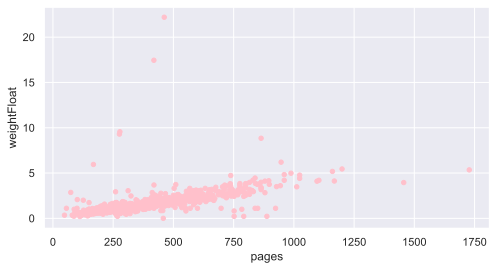

In [4]:
df.plot.scatter(x='pages', y='weightFloat', c='pink')

#### Question 4

In [ ]:
### compute Pearson's correlation between a book's volume (inferred by its dimensions) and price in the data
### (you can use the built-in Series.corr() function for that purpose)

In [12]:
def convertDimToFloat(str):
    if pd.isna(str): return str
    num1 = float(str.split(" ")[0]) 
    num2 = float(str.split(" ")[2]) 
    num3 = float(str.split(" ")[4]) 
    
    return num1*num2*num3


df['dimensionsNew'] = df['dimensions'].apply(convertDimToFloat)
mean_dimensions = df["dimensionsNew"].mean()
mean_price = df["price"].mean()

df['dimensionsNew'] = df['dimensionsNew'].fillna(mean_dimensions)
df['price'] = df['price'].fillna(mean_price)

correlation = df['price'].corr(df['dimensionsNew'])
res = pd.DataFrame({'Pearsos Corr': [correlation]})

print(res)

   Pearsos Corr
0       0.41851


#### Question 5

In [ ]:
### show a scatter plot of a book's volume (inferred by its dimensions) and price
### do the results fit the score you got in the previous cell? (no need to print answer to this question)

<AxesSubplot: xlabel='price', ylabel='dimensionsNew'>

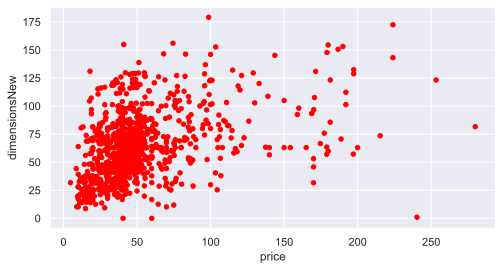

In [7]:
df.plot.scatter(x='price', y='dimensionsNew', c='red')


#### Question 6

In [ ]:
### compute Pearson's correlation between a book's number of pages and the books price
### (you can use the built-in Series.corr() function for that purpose)

In [15]:
corr_pages_price = df['pages'].corr(df["price"])
res2 = pd.DataFrame({'Pearson Corr': [corr_pages_price]})
print(res2)

   Pearson Corr
0      0.439074


#### Question 7

In [ ]:
### show a scatter plot of pages and price

<AxesSubplot: xlabel='pages', ylabel='price'>

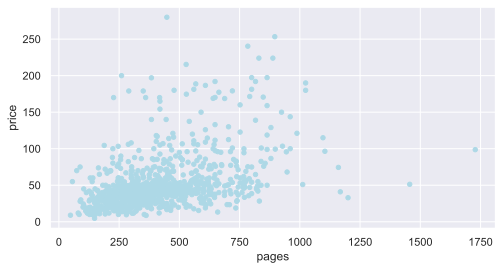

In [18]:
df.plot.scatter(x="pages", y="price", c="lightBlue")

#### Question 8

In [ ]:
### sample 10000 values from N~(10, 5)
### for this pirpose use https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

### what portion of the distribution is found in the range (2.5, 17.5)? -- calculate using z table
### (recall the NormalDist().cdf() function we used at the lecture)

### what portion of the distribution is found in the range (2.5, 17.5)? -- compute empirically using the sampled values
### report both values (calculated and empirical)

In [19]:
import numpy as np
from statistics import NormalDist

sample = np.random.normal(10, 5, 10000)
z = (2.5-10)/5
zscore = NormalDist().cdf(z)
count = 0

for num in sample:
    if num <= 17.5 and num >= 2.5:
        count += 1
pd.DataFrame({'The portion distribution using z table': [1 - 2*zscore],
             'The portion distribution  using the sample': [count / 10000]})


,The portion distribution using z table,The portion distribution using the sample
0,0.866386,0.867


#### Question 9

In [ ]:
### compute confidence interval of 95% for the true population mean of a book price on Amazon
### report left and right boundaries

#### Question 10

In [ ]:
### can one say with (at least) 85% confidence that the true population mean of a book price resides within the [50.0, 54.0] interval?
### show your computations, and print your answer: yes or no